In [43]:
import jieba

In [44]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/jh/bz0fdd8s2kj3qps782mmfkpw0000gq/T/jieba.cache
Loading model cost 1.316 seconds.
Prefix dict has been built succesfully.


Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学


In [74]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)

In [75]:
for n in seg_list:
    print(n)

我
来到
北京
清华
清华大学
华大
大学


In [117]:
x = "我來到北京清華大學"

In [118]:
seg_list = jieba.cut(x)
f = open('A.txt', 'w', encoding = 'UTF-8')  
for n in seg_list: 
    print(n)
    n_data = n + "\n"
#    print(n_data)
    f.write(n_data) 

我來
到
北京
清華大學


In [1]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob

def findFiles(path): return glob.glob(path)

print(findFiles('data/doc/*.txt'))

import unicodedata
import string


all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

#將Unicode轉ASCII
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

#print(unicodeToAscii('Ślusàrski'))

# 構建category_lines字典，每種語言的名稱列表
category_lines = {}
all_categories = []

# 讀取文件並分行
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [line for line in lines]

for filename in findFiles('data/doc/*.txt'):
    category = filename.split('/')[-1].split('.')[0]
    #18種類別
    all_categories.append(category)
    lines = readLines(filename)
    #category_lines 類別：名字List
    category_lines[category] = lines

n_categories = len(all_categories)

['data/doc/china.txt', 'data/doc/social.txt']


In [2]:
category_lines

{'china': ['大陸',
  '東南衛視',
  '駐台',
  '採訪',
  '資歷',
  '近',
  '10年',
  '的',
  '記者',
  '葉青林',
  '6',
  '月',
  '申請',
  '來台',
  '駐點',
  '遭拒',
  '陸委會',
  '副主委',
  '邱垂正',
  '昨天',
  '葉青林'],
 'social': ['記者',
  '王錦義',
  '花蓮',
  '報導',
  '台北市',
  '巨陞企業',
  '董事長',
  '陳宏育',
  '與',
  '夫人',
  '范錦美',
  '27',
  '日',
  '在',
  '中橫公路',
  '墜谷',
  '雙亡',
  '案',
  '據悉']}

In [3]:
print("all_letters: "+str(len(all_letters)))
print("n_categories: "+str(n_categories))
#print("category_lines:"+str(category_lines['雙亡'][:5]))

all_letters: 57
n_categories: 2


In [4]:
category_lines

{'china': ['大陸',
  '東南衛視',
  '駐台',
  '採訪',
  '資歷',
  '近',
  '10年',
  '的',
  '記者',
  '葉青林',
  '6',
  '月',
  '申請',
  '來台',
  '駐點',
  '遭拒',
  '陸委會',
  '副主委',
  '邱垂正',
  '昨天',
  '葉青林'],
 'social': ['記者',
  '王錦義',
  '花蓮',
  '報導',
  '台北市',
  '巨陞企業',
  '董事長',
  '陳宏育',
  '與',
  '夫人',
  '范錦美',
  '27',
  '日',
  '在',
  '中橫公路',
  '墜谷',
  '雙亡',
  '案',
  '據悉']}

在PyTorch中，我們需要將名字數據轉換成Tensor才能在模型中讀入使用。在本文中，最小粒度為字符，意思是我們將名字裡面的每個字符都作為一個獨立的語言粒度來處理，為了數學化字符，我們這裡使用”one-hot vector”來表示，這裡每個字符被表示成<1 * 57>的向量。由於名字由多個字符組成，所以每個名字就被表示成了2D的矩陣<名字字符個數 * 1 * 57>。


為了表示單個字母，我們使用大小<1 x n_letters>的“one-hot vector”，如：“b”= <0 1 0 0 0 ...>。

額外的1維度是因為PyTorch假設所有內容都是批量的 - 我們在這裡只使用1的批量大小。

In [5]:
import torch

# 建立函式方便尋找all_letters的Index像是"a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# 將一個字母轉成Tensor顯示
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# 建立one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('Z'))

print(lineToTensor('Jones').size())

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])
torch.Size([5, 1, 57])


In [6]:
import torch.nn as nn

 
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

為了運行這個網絡的一個步(step)，我們需要傳入輸入（在我們的例子中，當前字母的張量）和一個先前的隱藏狀態（初始化為零）。我們將返回輸出（每種語言的概率）和下一個隱藏狀態（我們為下一步保留）。

In [7]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output)

tensor([[-0.7073, -0.6792]])


為了提高效率，我們不希望為每一步創建一個新的Tensor，因此我們將使用lineToTensor而不是letterToTensor並使用切片。這可以通過預先計算批次的張量進一步優化。

In [8]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-0.7073, -0.6792]])


正如您所看到的，輸出是<1 x n_categories> Tensor，其中每個項目都是該類別的可能性（更高的可能性更高）。

## 訓練
## 訓練前準備

In [9]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('social', 1)


在進入培訓之前，我們應該做一些輔助功能。第一個是解釋網絡的輸出，我們知道這是每個類別的可能性。我們可以使用Tensor.topk獲取最大價值的索引

In [10]:
#我們也想要一個快速的方式來獲得一個訓練樣例（一個名字和它的語言）：
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = china / line = 6
category = china / line = 葉青林
category = social / line = 報導
category = social / line = 夫人
category = social / line = 雙亡
category = social / line = 范錦美
category = social / line = 巨陞企業
category = social / line = 花蓮
category = social / line = 雙亡
category = china / line = 來台


訓練過程如下：
1.創建輸入和目標張量  
2.創建一個初始隱藏狀態(0初始化)  
3.輸入該步字母然後保持該步的隱藏狀態，將此隱藏狀態和下一步的字母輸入一起組成下一步輸出  
4.比較最終輸出結果和標記目標(類)   
5.反向傳播(並且更新參數)  
6.返回輸出和損失  

In [11]:
criterion = nn.NLLLoss()

In [12]:
learning_rate = 0.005

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

現在我們只需要用一堆例子來運行它。由於功能返回輸出和損失，我們可以印出預測結果，並記錄繪圖的損失。打印每一個print_every的例子，並且取平均值。

In [13]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 2s) 0.7688 來台 / social ✗ (china)
10000 10% (0m 4s) 0.6292 大陸 / china ✓
15000 15% (0m 5s) 0.5955 與 / social ✓
20000 20% (0m 7s) 0.8112 墜谷 / china ✗ (social)
25000 25% (0m 9s) 0.6952 董事長 / china ✗ (social)
30000 30% (0m 11s) 0.7466 台北市 / china ✗ (social)
35000 35% (0m 13s) 0.7133 陳宏育 / china ✗ (social)
40000 40% (0m 15s) 0.7357 葉青林 / social ✗ (china)
45000 45% (0m 17s) 0.7792 王錦義 / china ✗ (social)
50000 50% (0m 18s) 0.7139 陳宏育 / china ✗ (social)
55000 55% (0m 20s) 0.6426 在 / social ✓
60000 60% (0m 22s) 0.7765 墜谷 / china ✗ (social)
65000 65% (0m 24s) 0.7097 范錦美 / china ✗ (social)
70000 70% (0m 26s) 0.6292 記者 / china ✓
75000 75% (0m 28s) 0.7623 花蓮 / china ✗ (social)
80000 80% (0m 30s) 0.7915 邱垂正 / social ✗ (china)
85000 85% (0m 32s) 0.3599 中橫公路 / social ✓
90000 90% (0m 34s) 0.6243 來台 / china ✓
95000 95% (0m 36s) 0.6924 27 / social ✓
100000 100% (0m 38s) 0.8271 王錦義 / china ✗ (social)


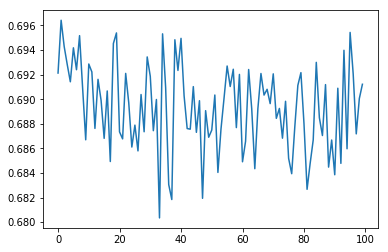

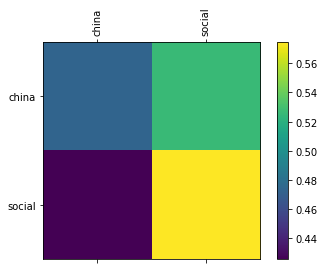

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

# 建立混淆矩陣
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# 回傳輸出
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# 檢視正確猜到的紀錄
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# 進行歸一化（變成0~1）
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# 畫圖
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# 設定xy軸
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# 建立標籤
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [42]:
def predict(input_line, n_predictions=1):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # 獲得N個類別
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print(all_categories[category_index])
            #print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('中橫公路')


> 中橫公路
social
